In [1]:
# This notebook contains cluster analysis code used to idnetify natural groupinps that may exist in a set of features.
# Specifically, we looked for groupings in the column containing earnings info (MN_EARN_WNE_MALE1_P10).
# Our aim was to use this grouping to bin column data for Decision Tree and PCA analyses.
# The goal was to improve model accuracy by using natural binning instead of conventional 20K band grouping.
# We found that natural binning actually reduced accuracy; it is not clear why this would be the case.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('consol_data.csv')
print(data.shape)

(1060, 71)


In [4]:
data.head()

,UNITID,INSTNM,CITY,STABBR,ZIP,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,PCT_BORN_US,...,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,AGE_ENTRY,FEMALE,FIRST_GEN,FAMINC
0,100654,Alabama A & M University,Normal,AL,35762,46.840000,47.980000,1.48,3.79,94.739998,...,0.0,0.0,0.0258,0.0000,0.1479,0.0000,20.277134,0.5472427116,0.3887357227,30489.792062
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,69.019997,27.760000,1.10,2.03,96.500000,...,0.0,0.0,0.0376,0.2231,0.1837,0.0188,23.584156,0.6369683532,0.3564593301,50315.256601
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,76.379997,18.980000,1.42,2.55,95.269997,...,0.0,0.0,0.0288,0.1892,0.2072,0.0117,23.152714,0.4779208832,0.3137931034,55624.221251
3,100751,The University of Alabama,Tuscaloosa,AL,35487-0166,75.349998,21.059999,1.20,2.41,96.080002,...,0.0,0.0,0.0295,0.1065,0.2886,0.0155,21.161128,0.607564495,0.2329344729,89976.373415
4,100830,Auburn University at Montgomery,Montgomery,AL,36117-3596,59.970001,37.209999,0.91,1.62,96.849998,...,0.0,0.0,0.0286,0.2555,0.2471,0.0134,22.438243,0.6838975297,0.3906485671,38489.309241


In [5]:
edu_df = data.replace('PrivacySuppressed', np.nan).dropna()
print(edu_df.shape)

(989, 71)


In [6]:
edu_df.columns

Index(['UNITID', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'PCT_WHITE', 'PCT_BLACK',
       'PCT_ASIAN', 'PCT_HISPANIC', 'PCT_BORN_US', 'MEDIAN_HH_INC',
       'LN_MEDIAN_HH_INC', 'POVERTY_RATE', 'UNEMP_RATE', 'LATITUDE',
       'LONGITUDE', 'ADM_RATE', 'ADM_RATE_ALL', 'SAT_AVG', 'COUNT_NWNE_P10',
       'COUNT_WNE_P10', 'MN_EARN_WNE_P10', 'MN_EARN_WNE_MALE0_P10',
       'MN_EARN_WNE_MALE1_P10', 'TUITIONFEE_IN', 'C150_4_WHITE',
       'C150_4_BLACK', 'C150_4_HISP', 'C150_4_ASIAN', 'PCIP01', 'PCIP03',
       'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13',
       'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24',
       'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38',
       'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45',
       'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52',
       'PCIP54', 'AGE_ENTRY', 'FEMALE', 'FIRST_GEN', 'FAMINC'],
      dtype='object')

In [7]:
subset_df = edu_df[['MN_EARN_WNE_MALE1_P10']].copy()
subset_df.head()

,MN_EARN_WNE_MALE1_P10
0,36900
1,54200
2,58400
3,58100
4,45300


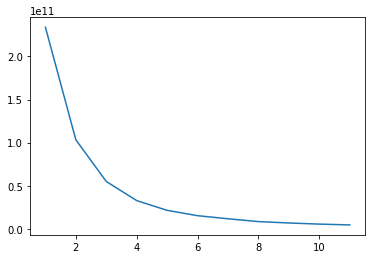

In [8]:
sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(subset_df)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 12), sse)
plt.show()

In [9]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(subset_df)
# Getting the cluster labels
predicted_clusters = kmeans.predict(subset_df)
# Centroid values
centroids = kmeans.cluster_centers_
print(centroids)

[[  59787.22891566]
 [  83206.89655172]
 [  46475.84745763]
 [ 132773.33333333]]


## Test code not used for the project
This code was used to visulaize any natural grouping that may exist between race (represented by % black student
population) and earning potential.

In [ ]:
y=subset_df.iloc[:, 1].values
X=subset_df.iloc[:, 0].values
plt.scatter(X, y, marker='.')
plt.show()

In [ ]:
plt.scatter(X, y, marker='.', c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [ ]:
# Repeat the process w/ minmax scaling applied to the dataframe

In [ ]:
X = subset_df[['PCT_BLACK']]
y = subset_df[['Mean earnings of students working and not enrolled 10 years after entry']]
X_minmax = MinMaxScaler().fit(X)
y_minmax = MinMaxScaler().fit(y)
X_transformed = X_minmax.transform(X)
y_tranformed = y_minmax.transform(y)
plt.scatter(X_transformed, y_tranformed, marker='.')
plt.show()

In [ ]:
scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(subset_df)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['PCT', 'Earning'])

minmax_sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(minmax_scaled_df)
    minmax_sse.append(kmeans.inertia_)
plt.plot(range(1, 12), sse)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=7)
kmeans = kmeans.fit(minmax_scaled_df)
# Getting the cluster labels
predicted_clusters = kmeans.predict(minmax_scaled_df)

print(kmeans.predict([[0.67, 0.09]]))

print(predicted_clusters[0])
# Centroid values
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
y=minmax_scaled_df.iloc[:, 1].values
X=minmax_scaled_df.iloc[:, 0].values
plt.scatter(X, y, marker='.', c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [ ]:
# Repeat the process w/ robust scaling

In [ ]:
X = subset_df[['PCT_BLACK']]
y = subset_df[['Mean earnings of students working and not enrolled 10 years after entry']]
scaler = preprocessing.RobustScaler()
X_robust = scaler.fit(X)
y_robust = scaler.fit(y)
X_transformed = X_robust.transform(X)
y_tranformed = y_robust.transform(y)
plt.scatter(X_transformed, y_tranformed, marker='.')
plt.show()

In [ ]:
robust_scaled_df = scaler.fit_transform(subset_df)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['PCT', 'Earning'])

minmax_sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(robust_scaled_df)
    minmax_sse.append(kmeans.inertia_)
plt.plot(range(1, 12), sse)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=7)
kmeans = kmeans.fit(robust_scaled_df)
# Getting the cluster labels
predicted_clusters = kmeans.predict(robust_scaled_df)
# Centroid values
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
y=robust_scaled_df.iloc[:, 1].values
X=robust_scaled_df.iloc[:, 0].values
plt.scatter(X, y, marker='.', c=predicted_clusters, s=50, cmap='viridis')
plt.show()